# PNEUMONIA
### Definition
<div style = "text-align: justify">An infection in one or both lungs, caused by bacteria, virus or fungi. It involves inflammation of alveoli and causes difficulty in breathing. With Pneumonia, air sacs will fluid or pus. The disease can be life threatening, particularly to infants and people above 65 years of age.</div>

### How to determine via Chest X-rays
<div style = "text-align: justify">When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify pneumonia.</div>

# DATASET

#### Structure
<div style = "text-align: justify">The dataset is organized into three folders - train, val and test, each having two subfolders (for corresponding class) <b>NORMAL</b> and <b>PNEUMONIA</b>.</div>

#### Source
<div style = "text-align: justify">The chest X-ray images were taken from pedriatic patients from Guangzhou Women and Children’s Medical Center, China. All chest radiographs were initially scanned for quality control by removing the low quality or unreadable scans.</div>

#### Link for the dataset - [Kaggle - Chest X-ray Images](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

In [1]:
import numpy as np
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
info = {0 : 'Normal', 1 : 'Pnuemonia'}

# CNN Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

from keras import Input
from keras.layers import Flatten

In [5]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), activation = 'relu', padding = 'same', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2,2), padding = 'valid'))
    
    return model

In [6]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [7]:
def cnn (filter1, filter2, filter3, hidden1) :
    
    # create the cnn  model
    model = Sequential()
    model.add(Input(shape = (128, 128, 1,)))
    
    # add convolution layer
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    # flatten and hidden layer
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    
    # output layer
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# Layers
#### Convolution layer
<div style = "text-align: justify">Kernels or filters are applied on this layer, which are convolved with portions of images to capture specific features (some capture edges, others capture contrast, etc). This also assists in reducing image size. Filters can be considered as weights for images (which they are sort of).</div>

#### BatchNormalization
<div style = "text-align: justify">It happens that the cost function curve may thin out at some axis. So this normalizes the Inputs for faster training. This causes the cost curve to look something like the figure below.</div>

![Image of cost function after normalization](https://i0.wp.com/www.adeveloperdiary.com/wp-content/uploads/2018/11/How-to-visualize-Gradient-Descent-using-Contour-plot-in-Python-adeveloperdiary.com-3.jpg?resize=640%2C480)

#### DropOut Layer
<div style = "text-align: justify">Asists in regularizing the weights by randomly deleting some units, so that the other nodes don't get to accustomed to the inputs and able to take variations into account.</div>

#### Max Pooling Layer
<div style = "text-align: justify">Move a window along the image to capture the dominant features in the image. Here the window size is (2,2).</div>

In [8]:
train_path = '../input/chest-xray-pneumonia/chest_xray/train/'
test_path  = '../input/chest-xray-pneumonia/chest_xray/test/'
eval_path  = '../input/chest-xray-pneumonia/chest_xray/val/'

# Dataset

In [9]:
import os
from sklearn.utils import shuffle
def give_set (path) :
    
    X = []
    y = []
    for label in os.listdir(path) :
        for img in os.listdir(path+label + '/') :

            img_path = path + label + '/' + img
            image = keras.preprocessing.image.load_img(img_path, color_mode = 'grayscale', target_size = (128,128))
    
            X.append(keras.preprocessing.image.img_to_array(image))
            y.append(1 if label == 'PNEUMONIA' else 0)

    X = np.array(X, dtype = float)
    y = np.array(y)
    
    return shuffle(X,y)

In [10]:
X_train, y_train = give_set(train_path)
X_eval, y_eval = give_set(eval_path)
X_test, y_test = give_set(test_path)

In [11]:
X_train /= 255.0
X_eval  /= 255.0
X_test  /= 255.0

# Class Distribution

In [12]:
print(X_train.shape)
print(y_train.shape)

(5216, 128, 128, 1)
(5216,)


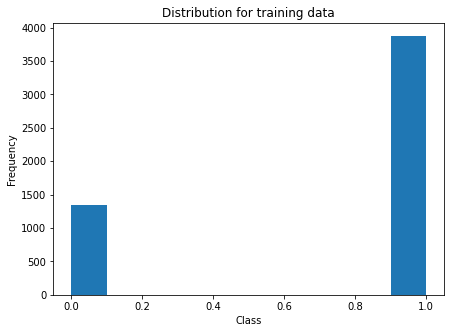

In [13]:
fig = plt.figure(figsize = (7,5))

plt.hist(y_train)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for training data')
plt.show()

In [14]:
print(X_eval.shape)
print(y_eval.shape)

(16, 128, 128, 1)
(16,)


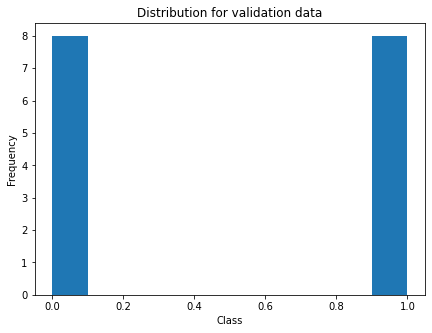

In [15]:
fig = plt.figure(figsize = (7,5))
plt.hist(y_eval)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for validation data')
plt.show()

In [16]:
print(X_test.shape)
print(y_test.shape)

(624, 128, 128, 1)
(624,)


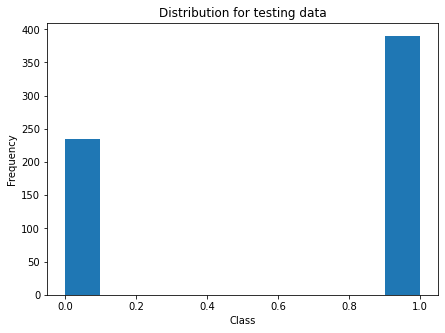

In [17]:
fig = plt.figure(figsize = (7,5))
plt.hist(y_test)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for testing data')
plt.show()

In [18]:
print(y_train[:30])

[1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1]


# Original training samples

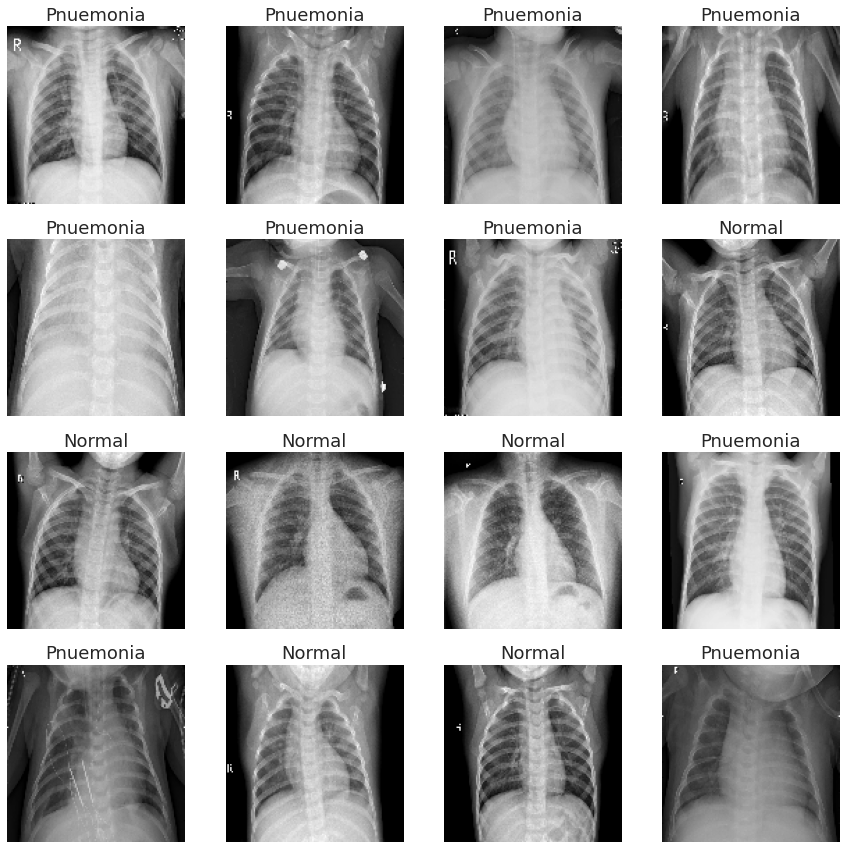

In [52]:
plt.figure(figsize = (15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], 'gray')
    plt.title(info[y_train[i]])
    plt.axis('off')
plt.show()

# Data skewness
#### *Will be handled by SMOTE (imblearn)*

In [20]:
print(y_train[y_train == 0].shape[0]/y_train.shape[0])

0.2570935582822086


In [21]:
from imblearn.over_sampling import SMOTE

X_train = X_train.reshape(5216, 128*128*1)
print(X_train.shape)
print(y_train.shape)

(5216, 16384)
(5216,)


In [22]:
X_train, y_train = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 1).fit_resample(X_train, y_train)

In [23]:
print(X_train.shape)
print(y_train.shape)

(7750, 16384)
(7750,)


In [24]:
X_train = X_train.reshape(7750, 128, 128, 1)

In [25]:
print(X_train.shape)
print(y_train.shape)

(7750, 128, 128, 1)
(7750,)


In [26]:
print(y_train[y_train == 0].shape[0]/y_train.shape[0])

0.5


# New generated samples

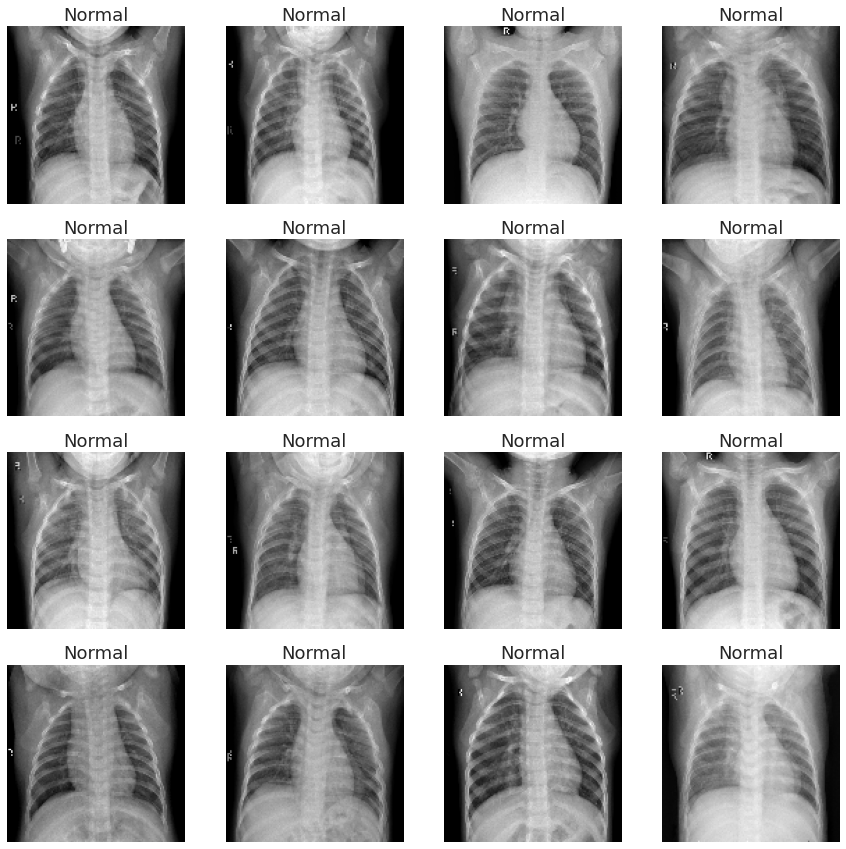

In [53]:
plt.figure(figsize = (15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[-(i+100)], 'gray')
    plt.title(info[y_train[-(i+100)]])
    plt.axis('off')
plt.show()

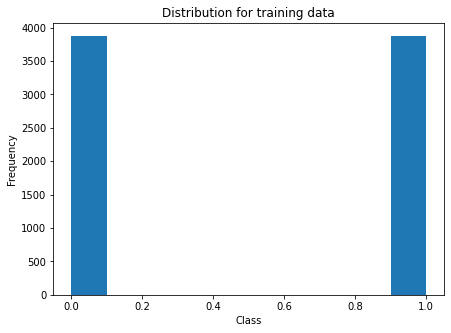

In [28]:
fig = plt.figure(figsize = (7,5))

plt.hist(y_train)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for training data')
plt.show()

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(zoom_range = [0.85,1.0], width_shift_range = 0.02, rotation_range = 5)

In [30]:
train_gen.fit(X_train)
itr = train_gen.flow(X_train, y_train, batch_size = 32)

In [31]:
trainX, trainy = itr.next()

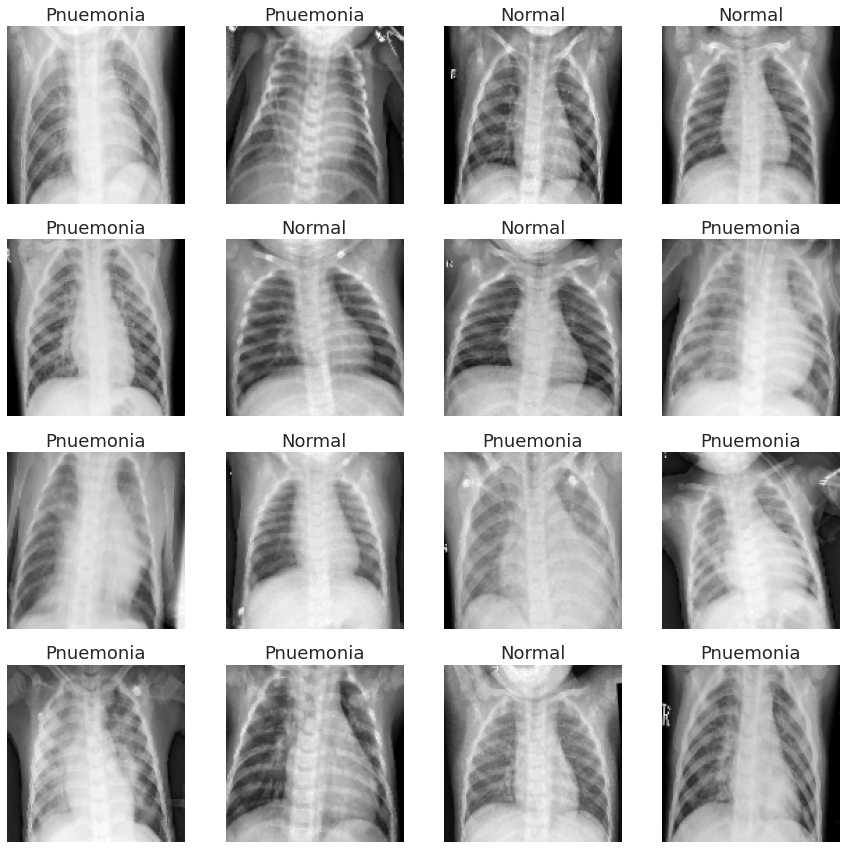

In [54]:
plt.figure(figsize=(15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(trainX[i], 'gray')
    plt.title(info[trainy[i]])
    plt.axis('off')
plt.show()

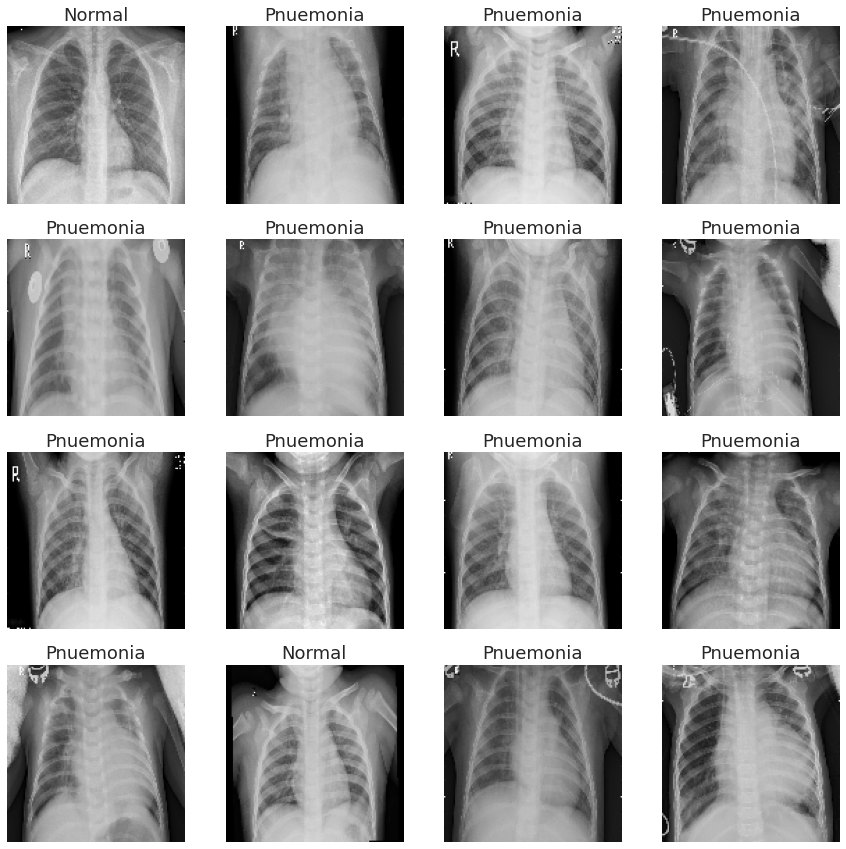

In [55]:
plt.figure(figsize=(15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i], 'gray')
    plt.title(info[y_test[i]])
    plt.axis('off')
plt.show()

In [34]:
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn = cnn, verbose = 1)

In [35]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [36]:
param = {
    'filter1' : [128, 200],
    'filter2' : [32, 64],
    'filter3' : [16, 32],
    'hidden1' : [32, 64],
}
grd = RandomizedSearchCV(estimator = model, param_distributions = param, cv = KFold(n_splits = 2, shuffle = True, random_state = 1), verbose = 1)

In [ ]:
search = grd.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 0)

In [ ]:
print(search.best_params_)

In [38]:
model = cnn(128, 32, 32, 64)
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 64, 64, 128)       1792      
_________________________________________________________________
sequential_7 (Sequential)    (None, 32, 32, 32)        37024     
_________________________________________________________________
sequential_8 (Sequential)    (None, 16, 16, 32)        9376      
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
sequential_9 (Sequential)    (None, 64)                524608    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 572,865
Trainable params: 572,353
Non-trainable params: 512
______________________________________________

In [39]:
from keras.callbacks import ReduceLROnPlateau
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience  = 10)

In [40]:
history = model.fit(train_gen.flow(X_train, y_train, batch_size = 32), epochs = 125, validation_data = (X_eval, y_eval), callbacks = [reduce], steps_per_epoch = len(X_train)/32)

Epoch 1/125
242/242 [==============================] - 12s 46ms/step - loss: 1.5911 - accuracy: 0.9111 - val_loss: 2.3890 - val_accuracy: 0.5000
Epoch 2/125
242/242 [==============================] - 12s 48ms/step - loss: 0.5264 - accuracy: 0.9482 - val_loss: 2.2851 - val_accuracy: 0.5000
Epoch 3/125
242/242 [==============================] - 11s 45ms/step - loss: 0.3762 - accuracy: 0.9447 - val_loss: 2.8438 - val_accuracy: 0.5000
Epoch 4/125
242/242 [==============================] - 11s 46ms/step - loss: 0.3200 - accuracy: 0.9558 - val_loss: 6.4253 - val_accuracy: 0.5000
Epoch 5/125
242/242 [==============================] - 12s 48ms/step - loss: 0.2865 - accuracy: 0.9578 - val_loss: 0.9004 - val_accuracy: 0.5625
Epoch 6/125
242/242 [==============================] - 11s 46ms/step - loss: 0.2691 - accuracy: 0.9524 - val_loss: 1.5026 - val_accuracy: 0.6250
Epoch 7/125
242/242 [==============================] - 11s 45ms/step - loss: 0.2836 - accuracy: 0.9511 - val_loss: 1.3256 - val_ac

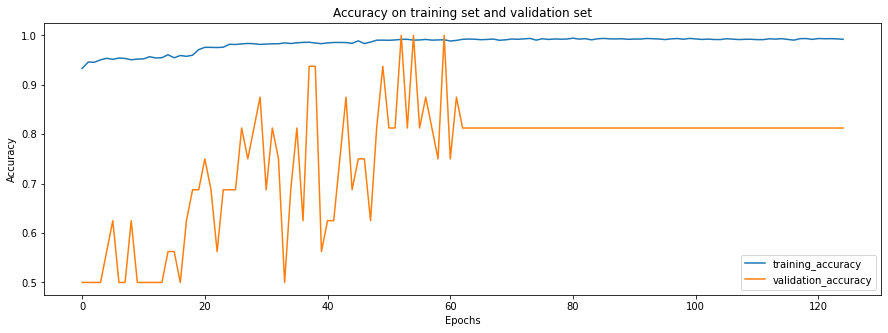

In [41]:
fig = plt.figure(figsize = (15,5))
plt.plot(history.history['accuracy'])                   # accuracy for the training set
plt.plot(history.history['val_accuracy'])               # sccuracy for the validate set
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.title('Accuracy on training set and validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

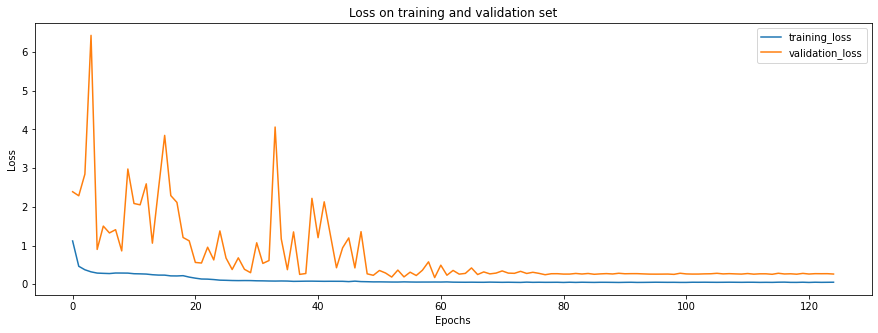

In [42]:
fig = plt.figure(figsize = (15,5))
plt.plot(history.history['loss'])                       # loss for the training set
plt.plot(history.history['val_loss'])                   # loss for the validate set
plt.legend(['training_loss', 'validation_loss'])
plt.title('Loss on training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict

In [43]:
model.save('./pnue_model.h5')

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred = np.array(y_pred.reshape(-1))

In [46]:
y_pred = np.around(y_pred)
y_pred = np.array(y_pred, dtype= int)

In [47]:
print(y_pred[:10])
print(y_test[:10])

[0 1 0 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1]


In [48]:
from sklearn.metrics import accuracy_score, classification_report

In [49]:
print('Accuarcy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names = ['Negative for Pneumonia', 'Positive for pneumonia']))

Accuarcy : 0.9022435897435898
                        precision    recall  f1-score   support

Negative for Pneumonia       0.92      0.81      0.86       234
Positive for pneumonia       0.89      0.96      0.92       390

              accuracy                           0.90       624
             macro avg       0.91      0.88      0.89       624
          weighted avg       0.90      0.90      0.90       624



# Draw a **confusion matrix** to evaluate the performance of the model

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

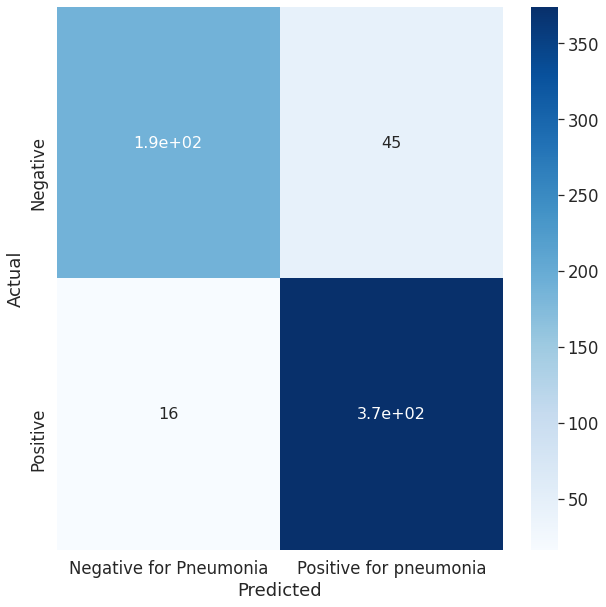

In [51]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
df_cm = pandas.DataFrame(data, columns = np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.set(font_scale = 1.5)
seaborn.heatmap(df_cm, cmap = 'Blues', annot = True, annot_kws = {'size' : 16}, xticklabels = ['Negative for Pneumonia', 'Positive for pneumonia'], yticklabels = ['Negative', 'Positive'])